In [48]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../../" not in sys.path:
  sys.path.append("../../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [49]:
env = BlackjackEnv()

In [62]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for i_episode in range(num_episodes+1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
            
        # Create a trajectory, one play time
        state = env.reset()
        episode = []
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, reward))
            if done:
                break
            state = next_state
        
        # From above experience, create value function basing on encountered states
        state_index_count = {}
        for i, (s, r)  in enumerate(episode):
            if s not in state_and_index:
                R = sum(r*discount_factor**k for k, (_,r) in enumerate(episode[i:]))
                count[s] += 1
                V[s] = V[s] + (R - V[s])/count[s]
    return V    

In [63]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

Episode 10000/10000.

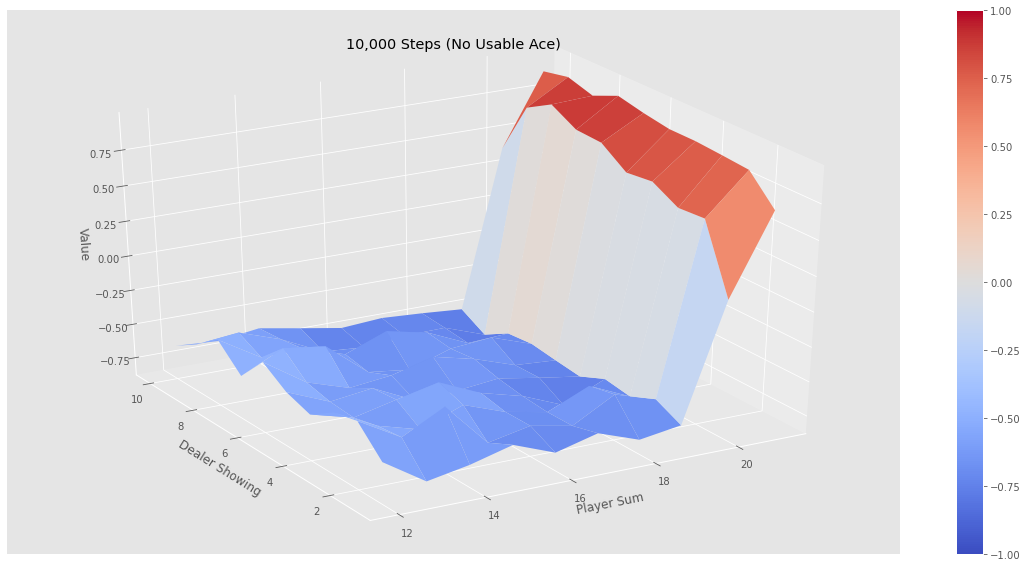

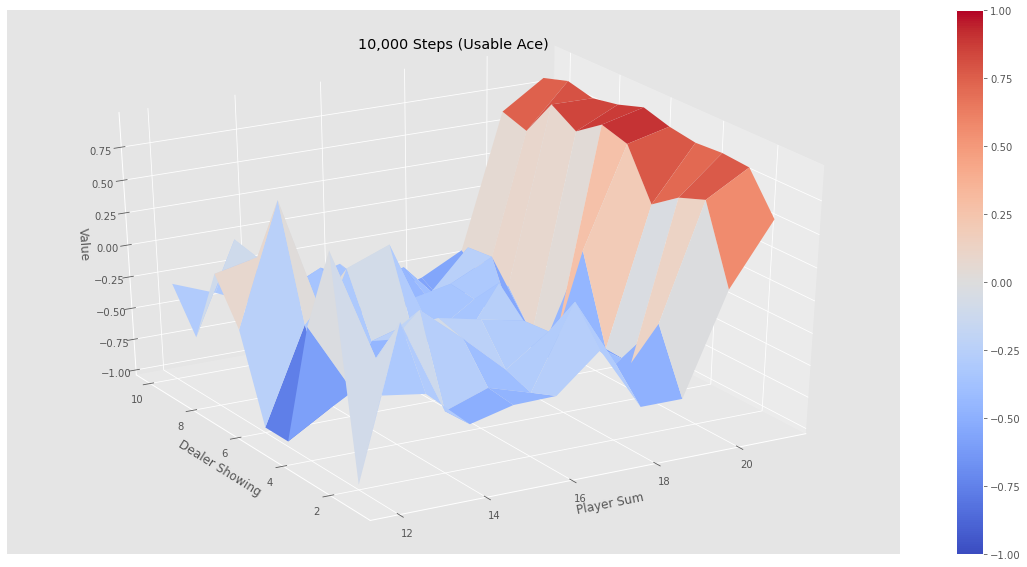

Episode 500000/500000.

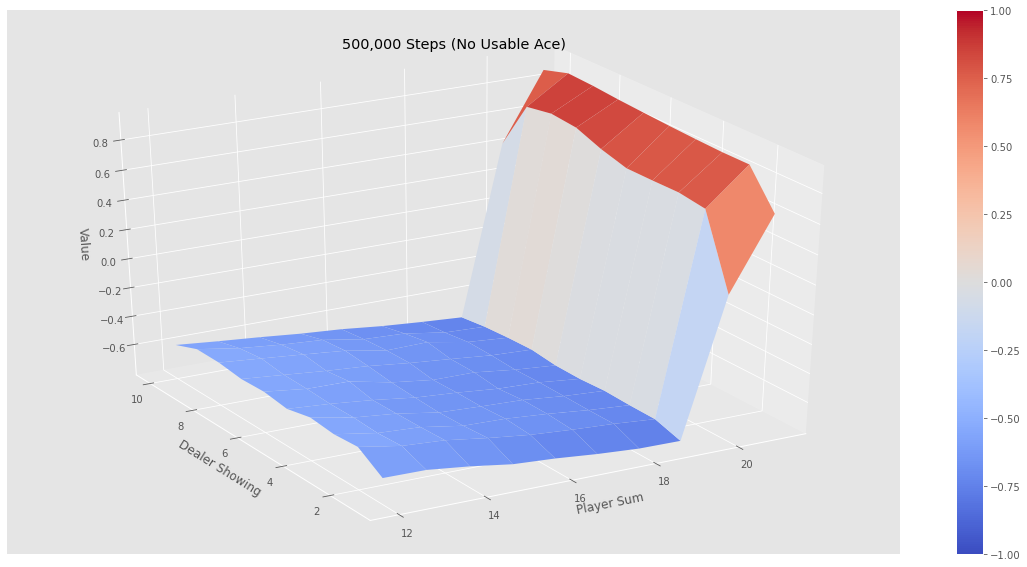

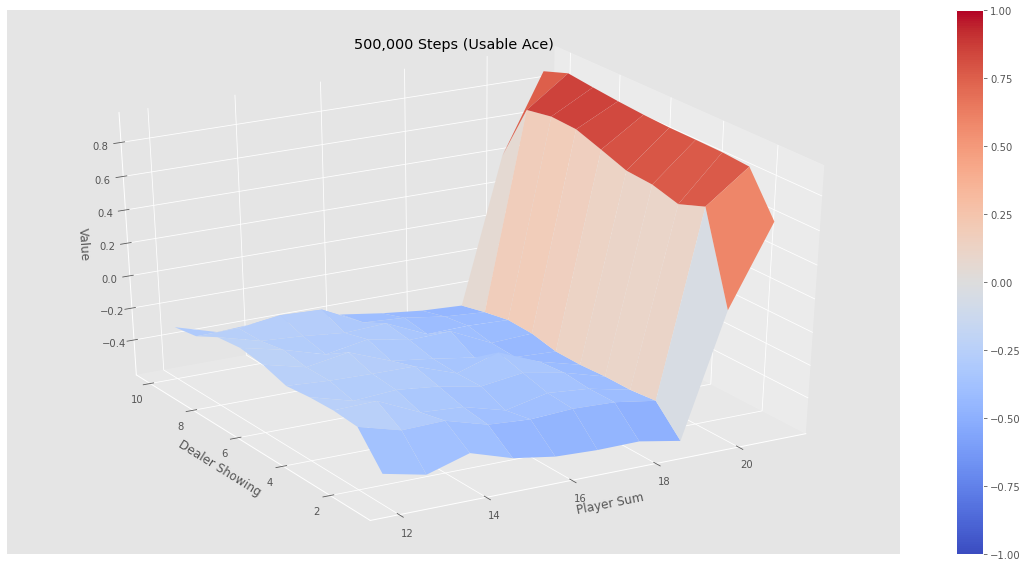

In [65]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")